Fetching data for AAPL from 2022-06-02 to 2024-06-01
Fetched data for AAPL
Fetching data for ABBV from 2022-06-02 to 2024-06-01
Fetched data for ABBV
Fetching data for ADBE from 2022-06-02 to 2024-06-01
Fetched data for ADBE
Fetching data for AMZN from 2022-06-02 to 2024-06-01
Fetched data for AMZN
Fetching data for AVGO from 2022-06-02 to 2024-06-01
Fetched data for AVGO
Fetching data for BRK-B from 2022-06-02 to 2024-06-01
Fetched data for BRK-B
Fetching data for CRM from 2022-06-02 to 2024-06-01
Fetched data for CRM
Fetching data for COST from 2022-06-02 to 2024-06-01
Fetched data for COST
Fetching data for CVX from 2022-06-02 to 2024-06-01
Fetched data for CVX
Fetching data for HD from 2022-06-02 to 2024-06-01
Fetched data for HD
Fetching data for JNJ from 2022-06-02 to 2024-06-01
Fetched data for JNJ
Fetching data for JPM from 2022-06-02 to 2024-06-01
Fetched data for JPM
Fetching data for LLY from 2022-06-02 to 2024-06-01
Fetched data for LLY
Fetching data for MA from 2022-06-02 

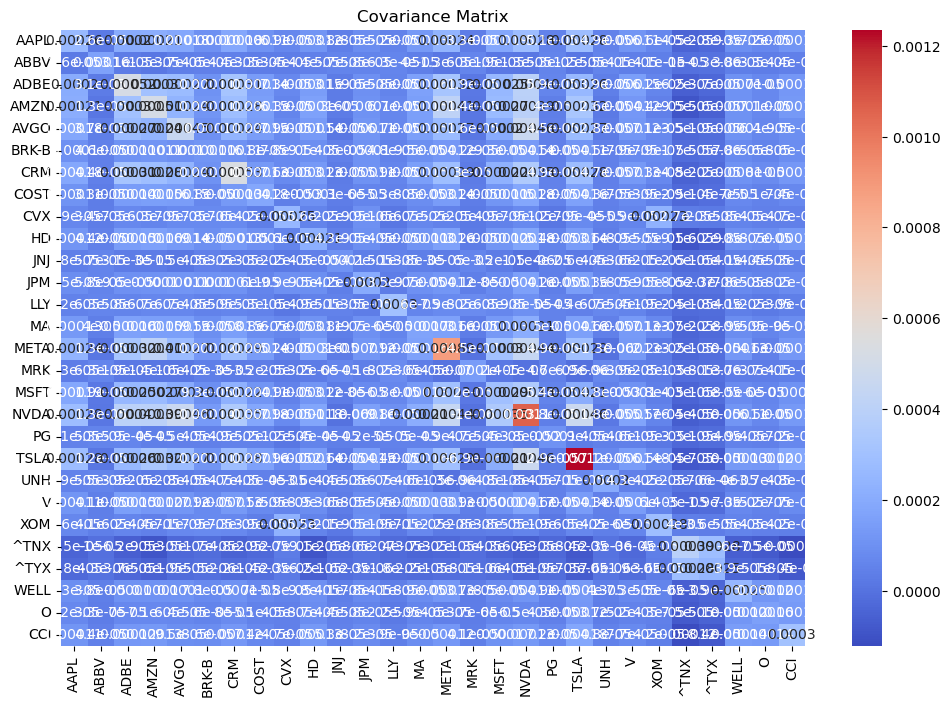

Composite Risk Profile: 0.7050000000000001
Target Risk Level: 0.15575000000000003
Risk-Free Rate: 0.0451200008392334


c:\Users\kahbe\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Target Risk: 0.05, Volatility: 0.09912827493733432, Return: 0.0784083081282475
Target Risk: 0.05408163265306123, Volatility: 0.09912827479718773, Return: 0.07840439181380518
Target Risk: 0.05816326530612245, Volatility: 0.09912827462985145, Return: 0.07840046169972488
Target Risk: 0.06224489795918368, Volatility: 0.09912827444917599, Return: 0.07839658882088207
Target Risk: 0.0663265306122449, Volatility: 0.09912827433519183, Return: 0.07839266566007805
Target Risk: 0.07040816326530613, Volatility: 0.09912827423781741, Return: 0.07838878641705234
Target Risk: 0.07448979591836735, Volatility: 0.09912827412631586, Return: 0.07838477477832577
Target Risk: 0.07857142857142857, Volatility: 0.0991282740258506, Return: 0.07838099773144384
Target Risk: 0.0826530612244898, Volatility: 0.09912827392828495, Return: 0.07837698292767756
Target Risk: 0.08673469387755103, Volatility: 0.0991282739300465, Return: 0.07837317539852606
Target Risk: 0.09081632653061225, Volatility: 0.09912827386294773, Ret

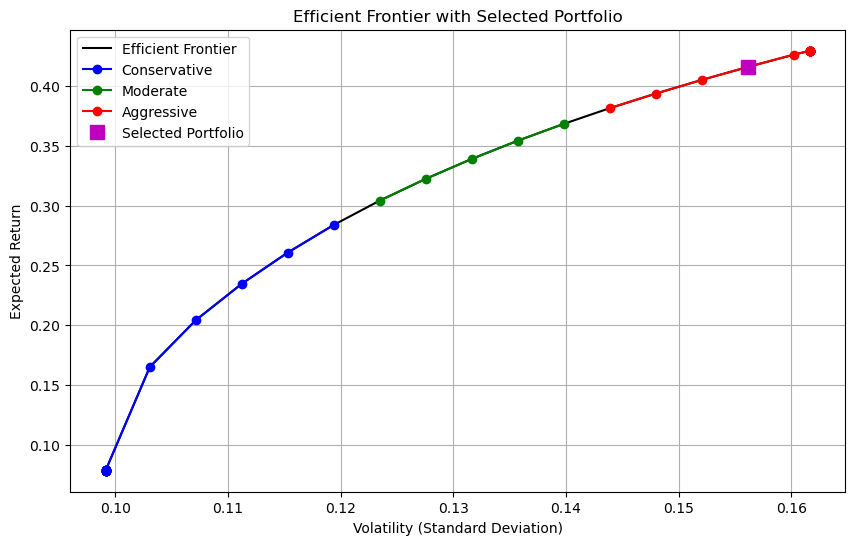

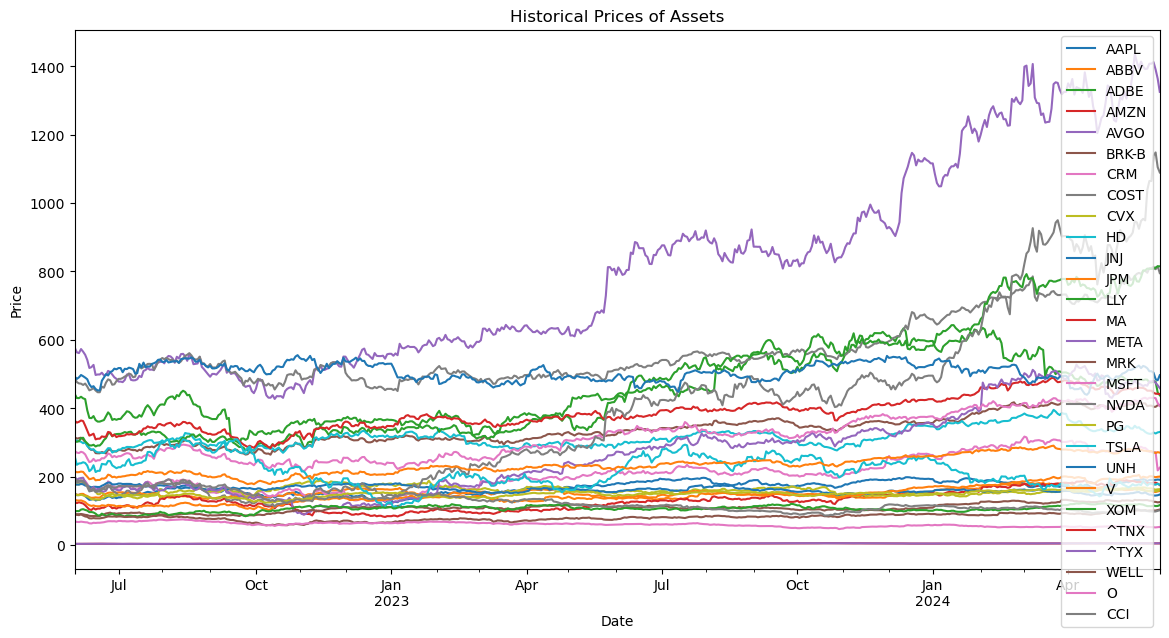

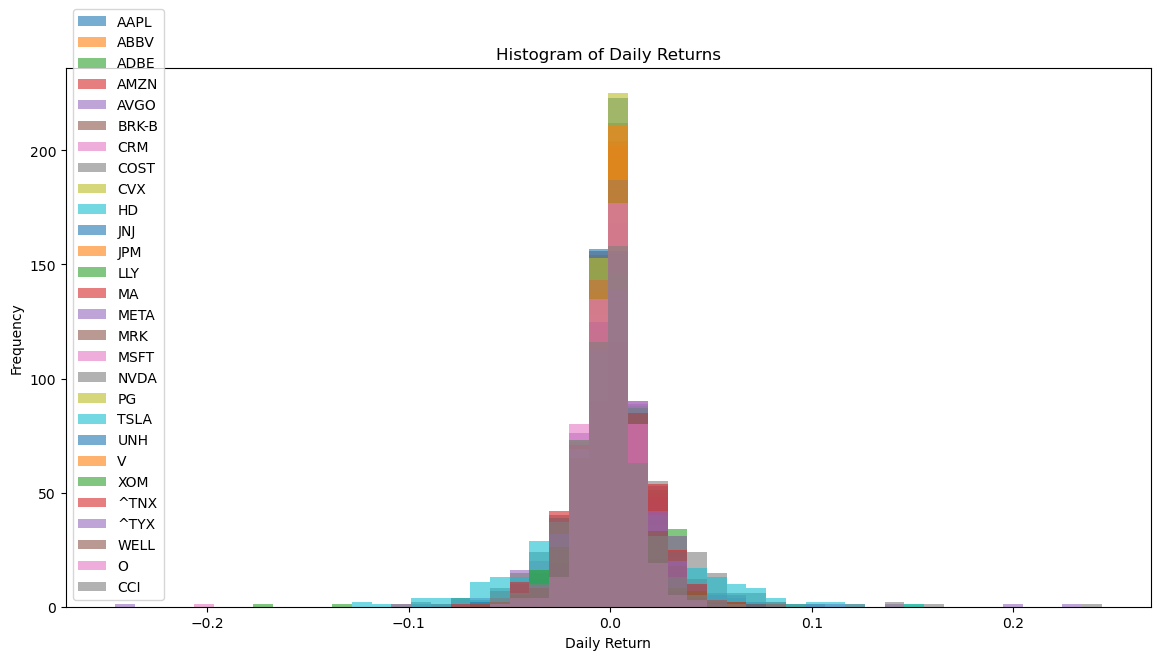

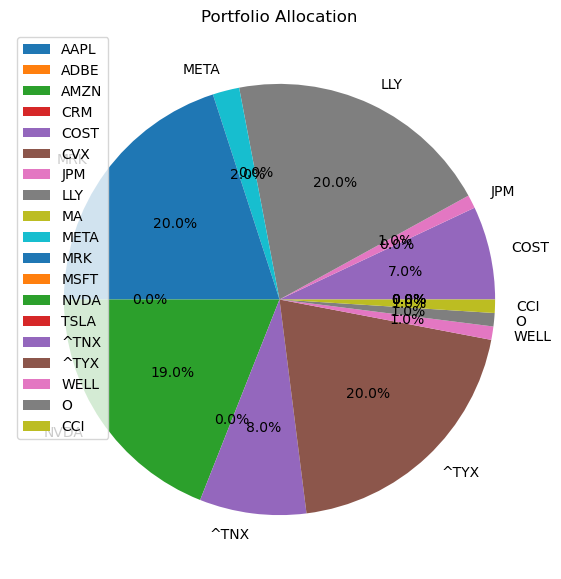

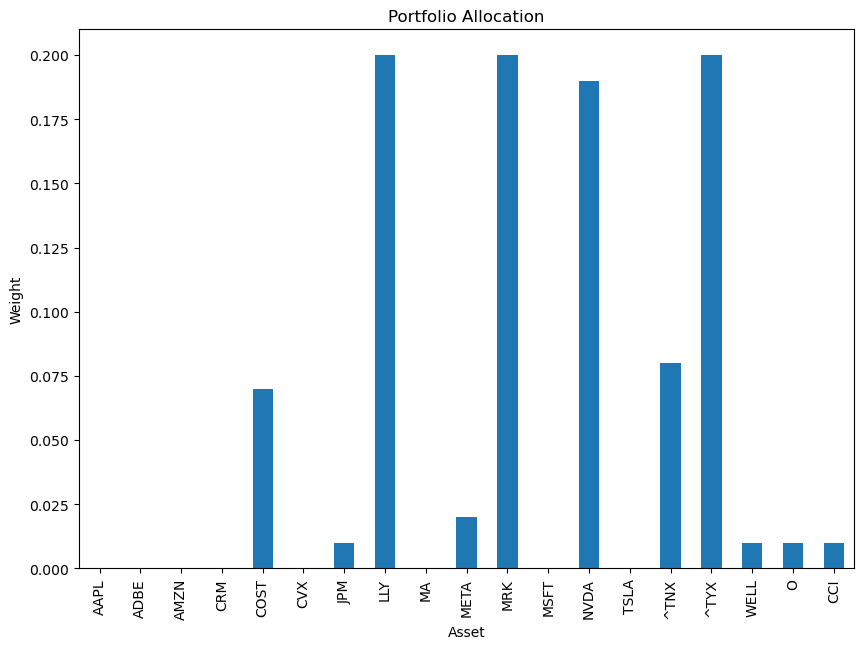

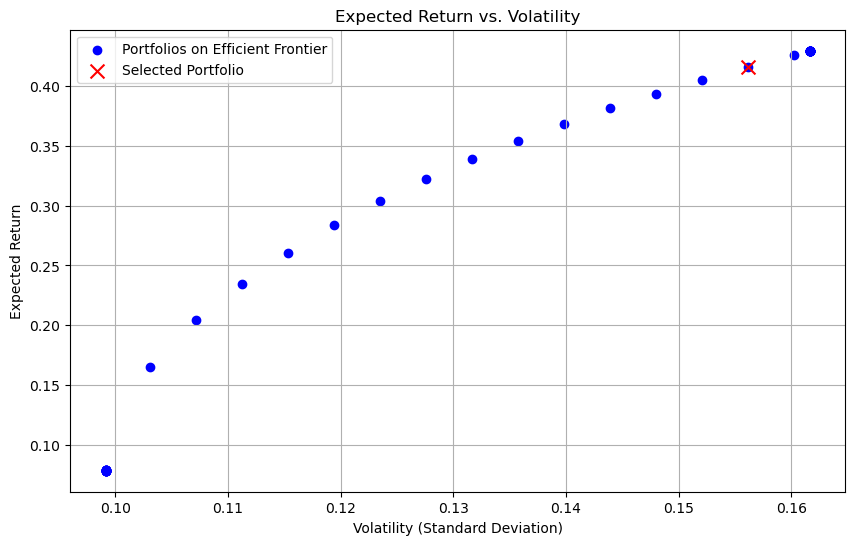

In [11]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from scipy.optimize import minimize
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Define the assets
stocks = ["AAPL", "ABBV", "ADBE", "AMZN", "AVGO", "BRK-B", "CRM", "COST", "CVX", "HD", 
          "JNJ", "JPM", "LLY", "MA", "META", "MRK", "MSFT", "NVDA", "PG", "TSLA", "UNH", "V", "XOM"]
bonds = ["^TNX", "^TYX"]
reits = ["WELL", "O", "CCI"]

assets = stocks + bonds + reits

# Set date range for the past 10 years
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=2*365)).strftime('%Y-%m-%d')

# Fetch historical data
data = {}
failed_assets = []
for asset in assets:
    try:
        print(f"Fetching data for {asset} from {start_date} to {end_date}")
        data[asset] = si.get_data(asset, start_date=start_date, end_date=end_date)['close']
        print(f"Fetched data for {asset}")
    except Exception as e:
        print(f"Failed to fetch data for {asset}: {e}")
        failed_assets.append(asset)

# Create a DataFrame from the fetched data
price_df = pd.DataFrame(data)

# Fill missing values by forward filling
price_df = price_df.ffill()

# Print the DataFrame to verify
print("Price DataFrame Head:")
print(price_df.head())
print("Price DataFrame Tail:")
print(price_df.tail())

# Drop columns with missing values
price_df = price_df.dropna(axis=1)

# Adjust the assets list based on successfully fetched data
valid_assets = price_df.columns.tolist()

# Ensure there are valid assets before proceeding
if len(valid_assets) == 0:
    raise ValueError("No valid assets fetched. Please check your asset list and data fetching process.")

# Calculate daily returns
returns_df = price_df.pct_change().dropna()
# Display the head and tail of returns_df to verify
print("Returns DataFrame Head:")
print(returns_df.head())
print("Returns DataFrame Tail:")
print(returns_df.tail())


# Calculate expected returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

# Plot the covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap="coolwarm", xticklabels=valid_assets, yticklabels=valid_assets)
plt.title('Covariance Matrix')
plt.show()
# Define normalization and composite risk profile calculation functions
def normalize_risk_tolerance_score(risk_tolerance_score):
    return risk_tolerance_score  # Assuming risk_tolerance_score is already between 0 and 1

def calculate_composite_risk_profile(risk_capacity, risk_tolerance_score):
    normalized_risk_tolerance_score = normalize_risk_tolerance_score(risk_tolerance_score)
    composite_risk_profile = (risk_capacity + normalized_risk_tolerance_score) / 2
    return composite_risk_profile

# def map_composite_risk_profile_to_target_risk(composite_risk_profile):
#     if composite_risk_profile <= 0.33:
#         # Conservative portfolio
#         min_risk_level = 0.05
#         max_risk_level = 0.10
#     elif composite_risk_profile <= 0.67:
#         # Balanced portfolio
#         min_risk_level = 0.10
#         max_risk_level = 0.15
#     else:
#         # Aggressive portfolio
#         min_risk_level = 0.15
#         max_risk_level = 0.30

#     return min_risk_level + (max_risk_level - min_risk_level) * (composite_risk_profile % 0.33)

def map_composite_risk_profile_to_target_risk(composite_risk_profile, min_risk_level=0.05, max_risk_level=0.20):
    return min_risk_level + (max_risk_level - min_risk_level) * composite_risk_profile
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)) * 252)
    return returns, std

def minimize_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

# Objective function to maximize the Sharpe ratio and target risk level
def objective_function(weights, mean_returns, cov_matrix, risk_free_rate, target_risk):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_volatility = minimize_volatility(weights, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    penalty = abs(portfolio_volatility - target_risk)
    return -sharpe_ratio + penalty  # Negative to maximize Sharpe ratio and penalty to target risk level

# Get optimal weights based on the target risk level
def get_optimal_weights(mean_returns, cov_matrix, risk_free_rate, target_risk):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate, target_risk)
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of weights must be 1
        {'type': 'ineq', 'fun': lambda x: target_risk - minimize_volatility(x, cov_matrix)}  # Ensure portfolio risk <= target risk
    )
    # bounds = tuple((0, 0.20) for asset in range(num_assets))  # Enforce diversification
    # Adjust bounds to ensure some allocation to REITs
    bounds = []
    for asset in assets:
        if asset in reits:
            bounds.append((0.01, 0.20))  # Ensure at least 1% allocation to REITs
        else:
            bounds.append((0, 0.20))
    bounds = tuple(bounds)

    result = minimize(objective_function, num_assets * [1./num_assets], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Define a function to calculate portfolios for a range of risk levels
def calculate_efficient_frontier(mean_returns, cov_matrix, risk_free_rate, num_portfolios=50):
    target_risks = np.linspace(0.05, 0.25, num_portfolios)  # Define a range of target risks
    portfolios = []

    for target_risk in target_risks:
        weights = get_optimal_weights(mean_returns, cov_matrix, risk_free_rate, target_risk)
        returns, std = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        print(f"Target Risk: {target_risk}, Volatility: {std}, Return: {returns}")
        portfolios.append((std, returns, weights))

    return portfolios

# Define user information and risk tolerance
user_age = 30
investment_horizon = 20  # years
investment_amount = 10000  # in dollars
user_income = 75000  # annual income in dollars
risk_tolerance_score = 0.66 # 0.0 (very low) to 1.0 (very high)
risk_capacity = 0.75 # Example risk capacity

# Calculate the composite risk profile
composite_risk_profile = calculate_composite_risk_profile(risk_capacity, risk_tolerance_score)
print(f"Composite Risk Profile: {composite_risk_profile}")

# Map composite risk profile to target risk level
target_risk = map_composite_risk_profile_to_target_risk(composite_risk_profile)
print(f"Target Risk Level: {target_risk}")

# Define the risk-free rate (using the 10-year Treasury yield as a proxy)
risk_free_rate = si.get_data("^TNX")['close'].iloc[-1] / 100
print(f"Risk-Free Rate: {risk_free_rate}")


# Calculate the efficient frontier
efficient_frontier = calculate_efficient_frontier(mean_returns, cov_matrix, risk_free_rate)

# Automatically select the best portfolio based on the target risk level
selected_portfolio = min(efficient_frontier, key=lambda x: abs(x[0] - target_risk))
selected_weights = selected_portfolio[2]

# Filter out assets with non-zero weights
non_zero_weights = selected_weights[selected_weights > 0]
non_zero_assets = np.array(valid_assets)[selected_weights > 0]

# Normalize the weights to sum up to 1 (100%)
normalized_weights = non_zero_weights / np.sum(non_zero_weights)

# Round the weights to two decimal places
rounded_weights = np.round(normalized_weights, 2)

# Adjust the weights to ensure they sum to 1 after rounding
diff = 1.0 - np.sum(rounded_weights)
rounded_weights[np.argmax(rounded_weights)] += diff

# Create a DataFrame for the filtered and normalized portfolio
optimal_portfolio = pd.DataFrame({'Asset': non_zero_assets, 'Weight': rounded_weights})

# Display the filtered and normalized portfolio allocation
print(optimal_portfolio)

# Calculate the expected return and volatility of the optimal portfolio
optimal_return, optimal_volatility = portfolio_annualized_performance(rounded_weights, mean_returns.loc[non_zero_assets], cov_matrix.loc[non_zero_assets, non_zero_assets])
sharpe_ratio = (optimal_return - risk_free_rate) / optimal_volatility

print(f"Expected Portfolio Return: {optimal_return * 100:.2f}%")
print(f"Expected Portfolio Volatility: {optimal_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Categorize the assets based on their types
portfolio_stocks = []
portfolio_bonds = []
portfolio_reits = []

for asset, weight in zip(non_zero_assets, rounded_weights):
    if asset in stocks:
        portfolio_stocks.append((asset, weight))
    elif asset in bonds:
        portfolio_bonds.append((asset, weight))
    elif asset in reits:
        portfolio_reits.append((asset, weight))

# Display the user's portfolio in array format
user_portfolio = {
    "Stocks": portfolio_stocks,
    "Bonds": portfolio_bonds,
    "REITs": portfolio_reits
}

# Calculate the total amount allocated to each asset class
total_stocks = sum(weight for asset, weight in user_portfolio["Stocks"])
total_bonds = sum(weight for asset, weight in user_portfolio["Bonds"])
total_reits = sum(weight for asset, weight in user_portfolio["REITs"])

amount_stocks = total_stocks * investment_amount
amount_bonds = total_bonds * investment_amount
amount_reits = total_reits * investment_amount

print("User's Portfolio:")
print("Stocks:", user_portfolio["Stocks"])
print("Bonds:", user_portfolio["Bonds"])
print("REITs:", user_portfolio["REITs"])

print("\nInvestment Amount Allocation:")
print(f"Total Investment Amount: ${investment_amount}")
print(f"Amount in Stocks: ${amount_stocks:.2f}")
print(f"Amount in Bonds: ${amount_bonds:.2f}")
print(f"Amount in REITs: ${amount_reits:.2f}")


# Split the efficient frontier into conservative, moderate, and aggressive sections based on dynamic thresholds
min_volatility = min(p[0] for p in efficient_frontier)
max_volatility = max(p[0] for p in efficient_frontier)
volatility_range = max_volatility - min_volatility

# Define dynamic thresholds
conservative_threshold = min_volatility + volatility_range / 3
moderate_threshold = min_volatility + 2 * volatility_range / 3

# Allocate the portfolios dynamically
conservative_portfolios = [p for p in efficient_frontier if p[0] <= conservative_threshold]
moderate_portfolios = [p for p in efficient_frontier if conservative_threshold < p[0] <= moderate_threshold]
aggressive_portfolios = [p for p in efficient_frontier if p[0] > moderate_threshold]

# Ensure each section has at least one portfolio
if not conservative_portfolios:
    conservative_portfolios.append(efficient_frontier[0])
if not moderate_portfolios:
    moderate_portfolios.append(efficient_frontier[len(efficient_frontier)//2])
if not aggressive_portfolios:
    aggressive_portfolios.append(efficient_frontier[-1])

# Extract weights for the first portfolio in each section
conservative_start = conservative_portfolios[0]
moderate_start = moderate_portfolios[0]
aggressive_start = aggressive_portfolios[0]

# Plot the efficient frontier with sections and the selected portfolio
plt.figure(figsize=(10, 6))
plt.plot([p[0] for p in efficient_frontier], [p[1] for p in efficient_frontier], 'k-', label='Efficient Frontier')
plt.plot([p[0] for p in conservative_portfolios], [p[1] for p in conservative_portfolios], 'bo-', label='Conservative')
plt.plot([p[0] for p in moderate_portfolios], [p[1] for p in moderate_portfolios], 'go-', label='Moderate')
plt.plot([p[0] for p in aggressive_portfolios], [p[1] for p in aggressive_portfolios], 'ro-', label='Aggressive')
plt.plot(selected_portfolio[0], selected_portfolio[1], 'ms', markersize=10, label='Selected Portfolio')  # Highlight the selected portfolio

plt.title('Efficient Frontier with Selected Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot historical prices
price_df.plot(figsize=(14, 7), title='Historical Prices of Assets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot returns
returns_df.plot(kind='hist', bins=50, alpha=0.6, figsize=(14, 7), title='Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.show()


# Plot the portfolio allocation
optimal_portfolio.plot(kind='pie', y='Weight', labels=optimal_portfolio['Asset'], autopct='%1.1f%%', figsize=(10, 7), title='Portfolio Allocation')
plt.ylabel('')
plt.show()

# Alternatively, a bar chart
optimal_portfolio.plot(kind='bar', x='Asset', y='Weight', legend=False, figsize=(10, 7), title='Portfolio Allocation')
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.show()


# Plot the expected return and volatility of the selected portfolio
plt.figure(figsize=(10, 6))
plt.scatter([p[0] for p in efficient_frontier], [p[1] for p in efficient_frontier], c='blue', marker='o', label='Portfolios on Efficient Frontier')
plt.scatter(selected_portfolio[0], selected_portfolio[1], c='red', marker='x', s=100, label='Selected Portfolio')  # Highlight the selected portfolio

plt.title('Expected Return vs. Volatility')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid(True)
plt.show()



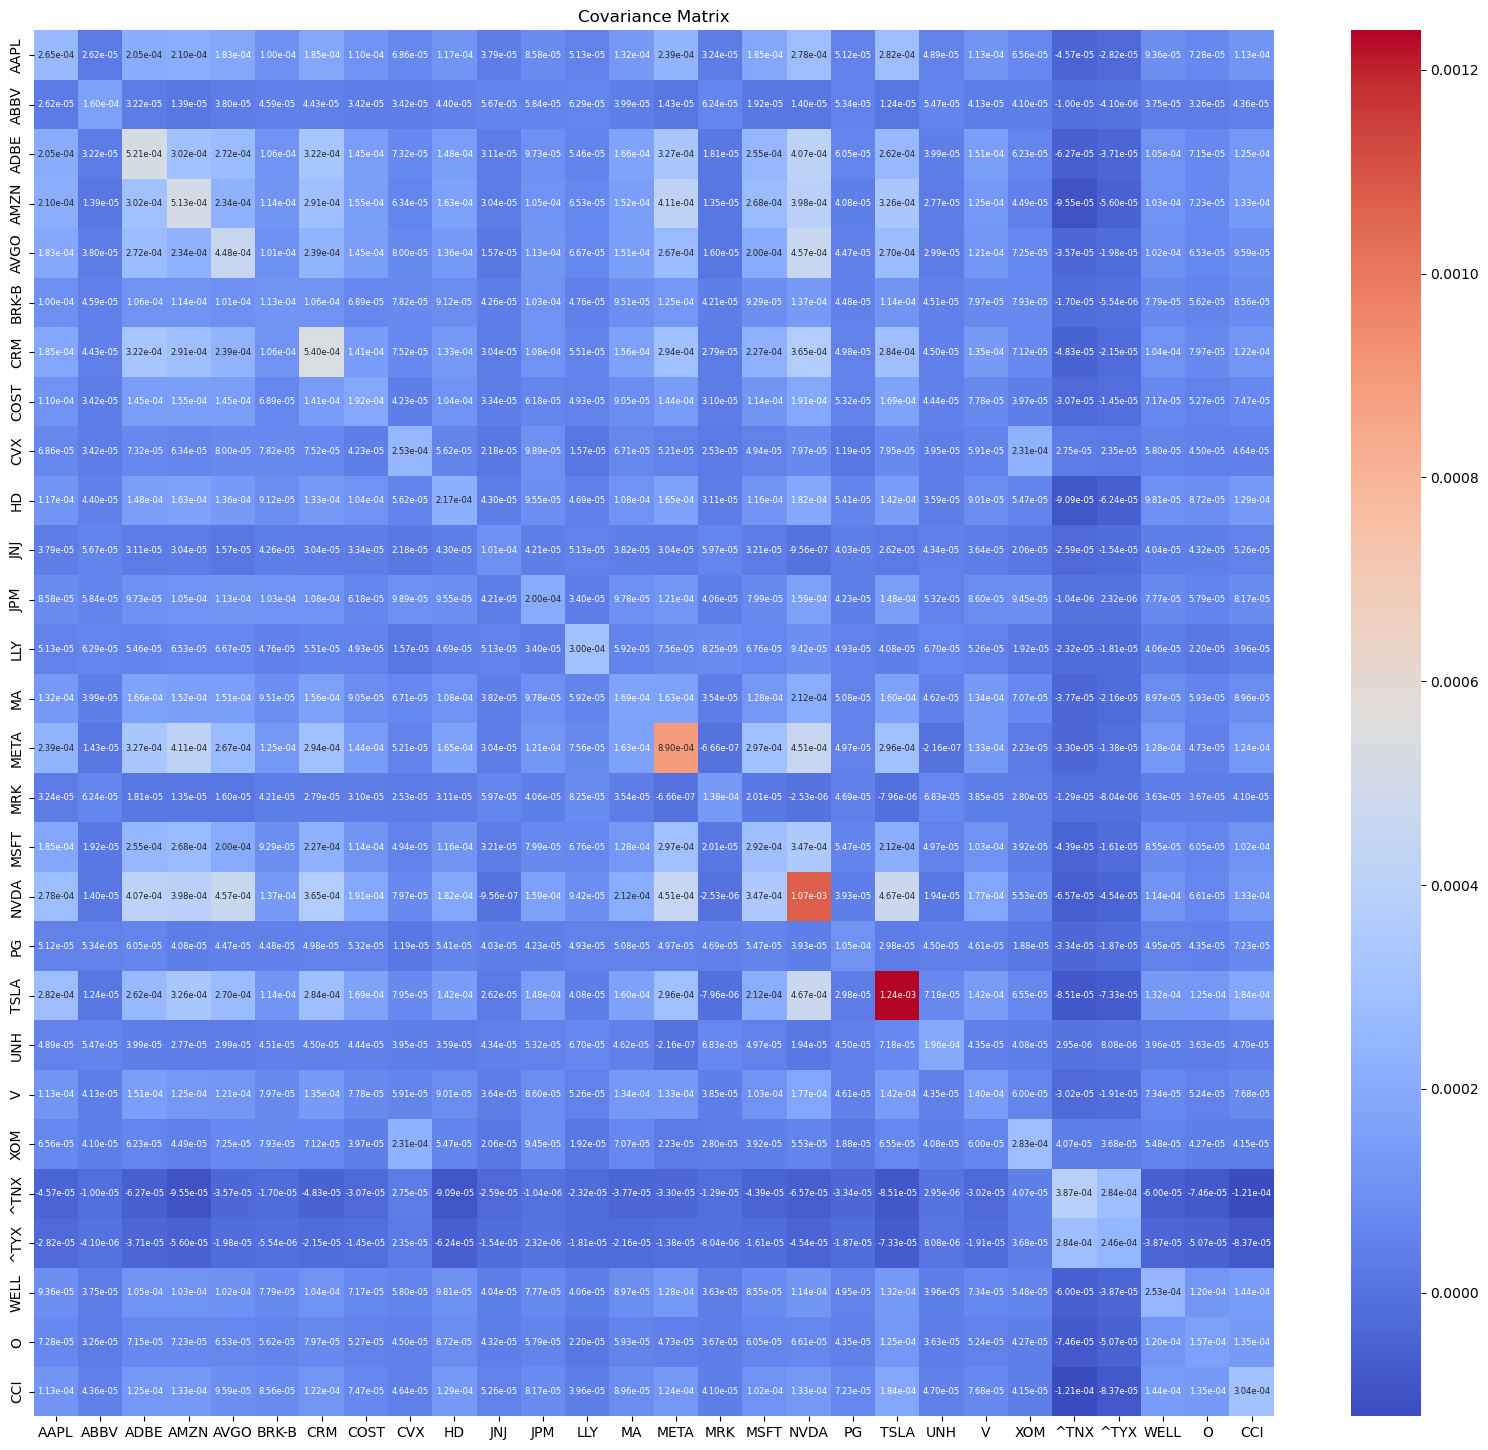

In [9]:
# Plot the covariance matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cov_matrix, annot=True, fmt='.2e', cmap="coolwarm", xticklabels=valid_assets, yticklabels=valid_assets, annot_kws={"size": 6})
plt.title('Covariance Matrix')
plt.show()

graph TB
    A[Data Collection] --> B[Calculate Expected Returns and Covariance Matrix]
    B --> C[Define Optimization Problem]
    C --> D[Execute Optimization]
    D --> E[Calculate Portfolio Performance Metrics]
    E --> F[Construct Final Portfolio]

    subgraph Data Collection
        A1[Gather historical data for various assets] --> A2[Prepare data for analysis]
    end

    subgraph Calculate Expected Returns and Covariance Matrix
        B1[Calculate daily returns] --> B2[Annualize mean returns]
        B2 --> B3[Compute covariance matrix]
    end

    subgraph Define Optimization Problem
        C1[Define objective function to minimize risk] --> C2[Set constraints (sum of weights = 1)]
        C2 --> C3[Set bounds (weights between 0 and 1)]
    end

    subgraph Execute Optimization
        D1[Use optimization algorithm (e.g., SLSQP)] --> D2[Find optimal asset weights]
    end

    subgraph Calculate Portfolio Performance Metrics
        E1[Calculate expected return of the portfolio] --> E2[Calculate volatility of the portfolio]
        E2 --> E3[Calculate Sharpe ratio]
    end

    subgraph Construct Final Portfolio
        F1[Allocate investment amount based on optimal weights] --> F2[Translate theoretical weights into dollar amounts]
    end

    style A1 fill:#f9f,stroke:#333,stroke-width:2px;
    style B1 fill:#9f9,stroke:#333,stroke-width:2px;
    style C1 fill:#ff9,stroke:#333,stroke-width:2px;
    style D1 fill:#9ff,stroke:#333,stroke-width:2px;
    style E1 fill:#f99,stroke:#333,stroke-width:2px;
    style F1 fill:#99f,stroke:#333,stroke-width:2px;
